<a href="https://colab.research.google.com/github/RedBatProject/Works/blob/main/work_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sys import exit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import random as rn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random as rn
from sklearn.cluster import KMeans #one with clusterimg (disaster)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier #that zero
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# !pip install catboost
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import datasets, metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
print("WELLCOME TO IMPLEMENTATION")

WELLCOME TO IMPLEMENTATION


# Kaggle

In [3]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"willyvonka","key":"2e9df042075e2ca80586e55c66c656a0"}'}

In [4]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d adityakadiwal/water-potability

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 112MB/s]


In [17]:
!unzip /content/water-potability.zip

Archive:  /content/water-potability.zip
  inflating: water_potability.csv    


In [18]:
import os
path0 = '/content/drive/MyDrive/work 44 water/'
path = f'{path0}results/'
# os.mkdir(path)

In [19]:
!mv '/content/water_potability.csv' '/content/drive/MyDrive/work 44 water'

# Loading data

In [20]:
df = pd.read_csv('/content/drive/MyDrive/work 44 water/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [27]:
for i in df.columns[0:-1]:
    mea = df[i].mean()
    df[i].fillna(mea,inplace=True)

In [28]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# Initial work on data

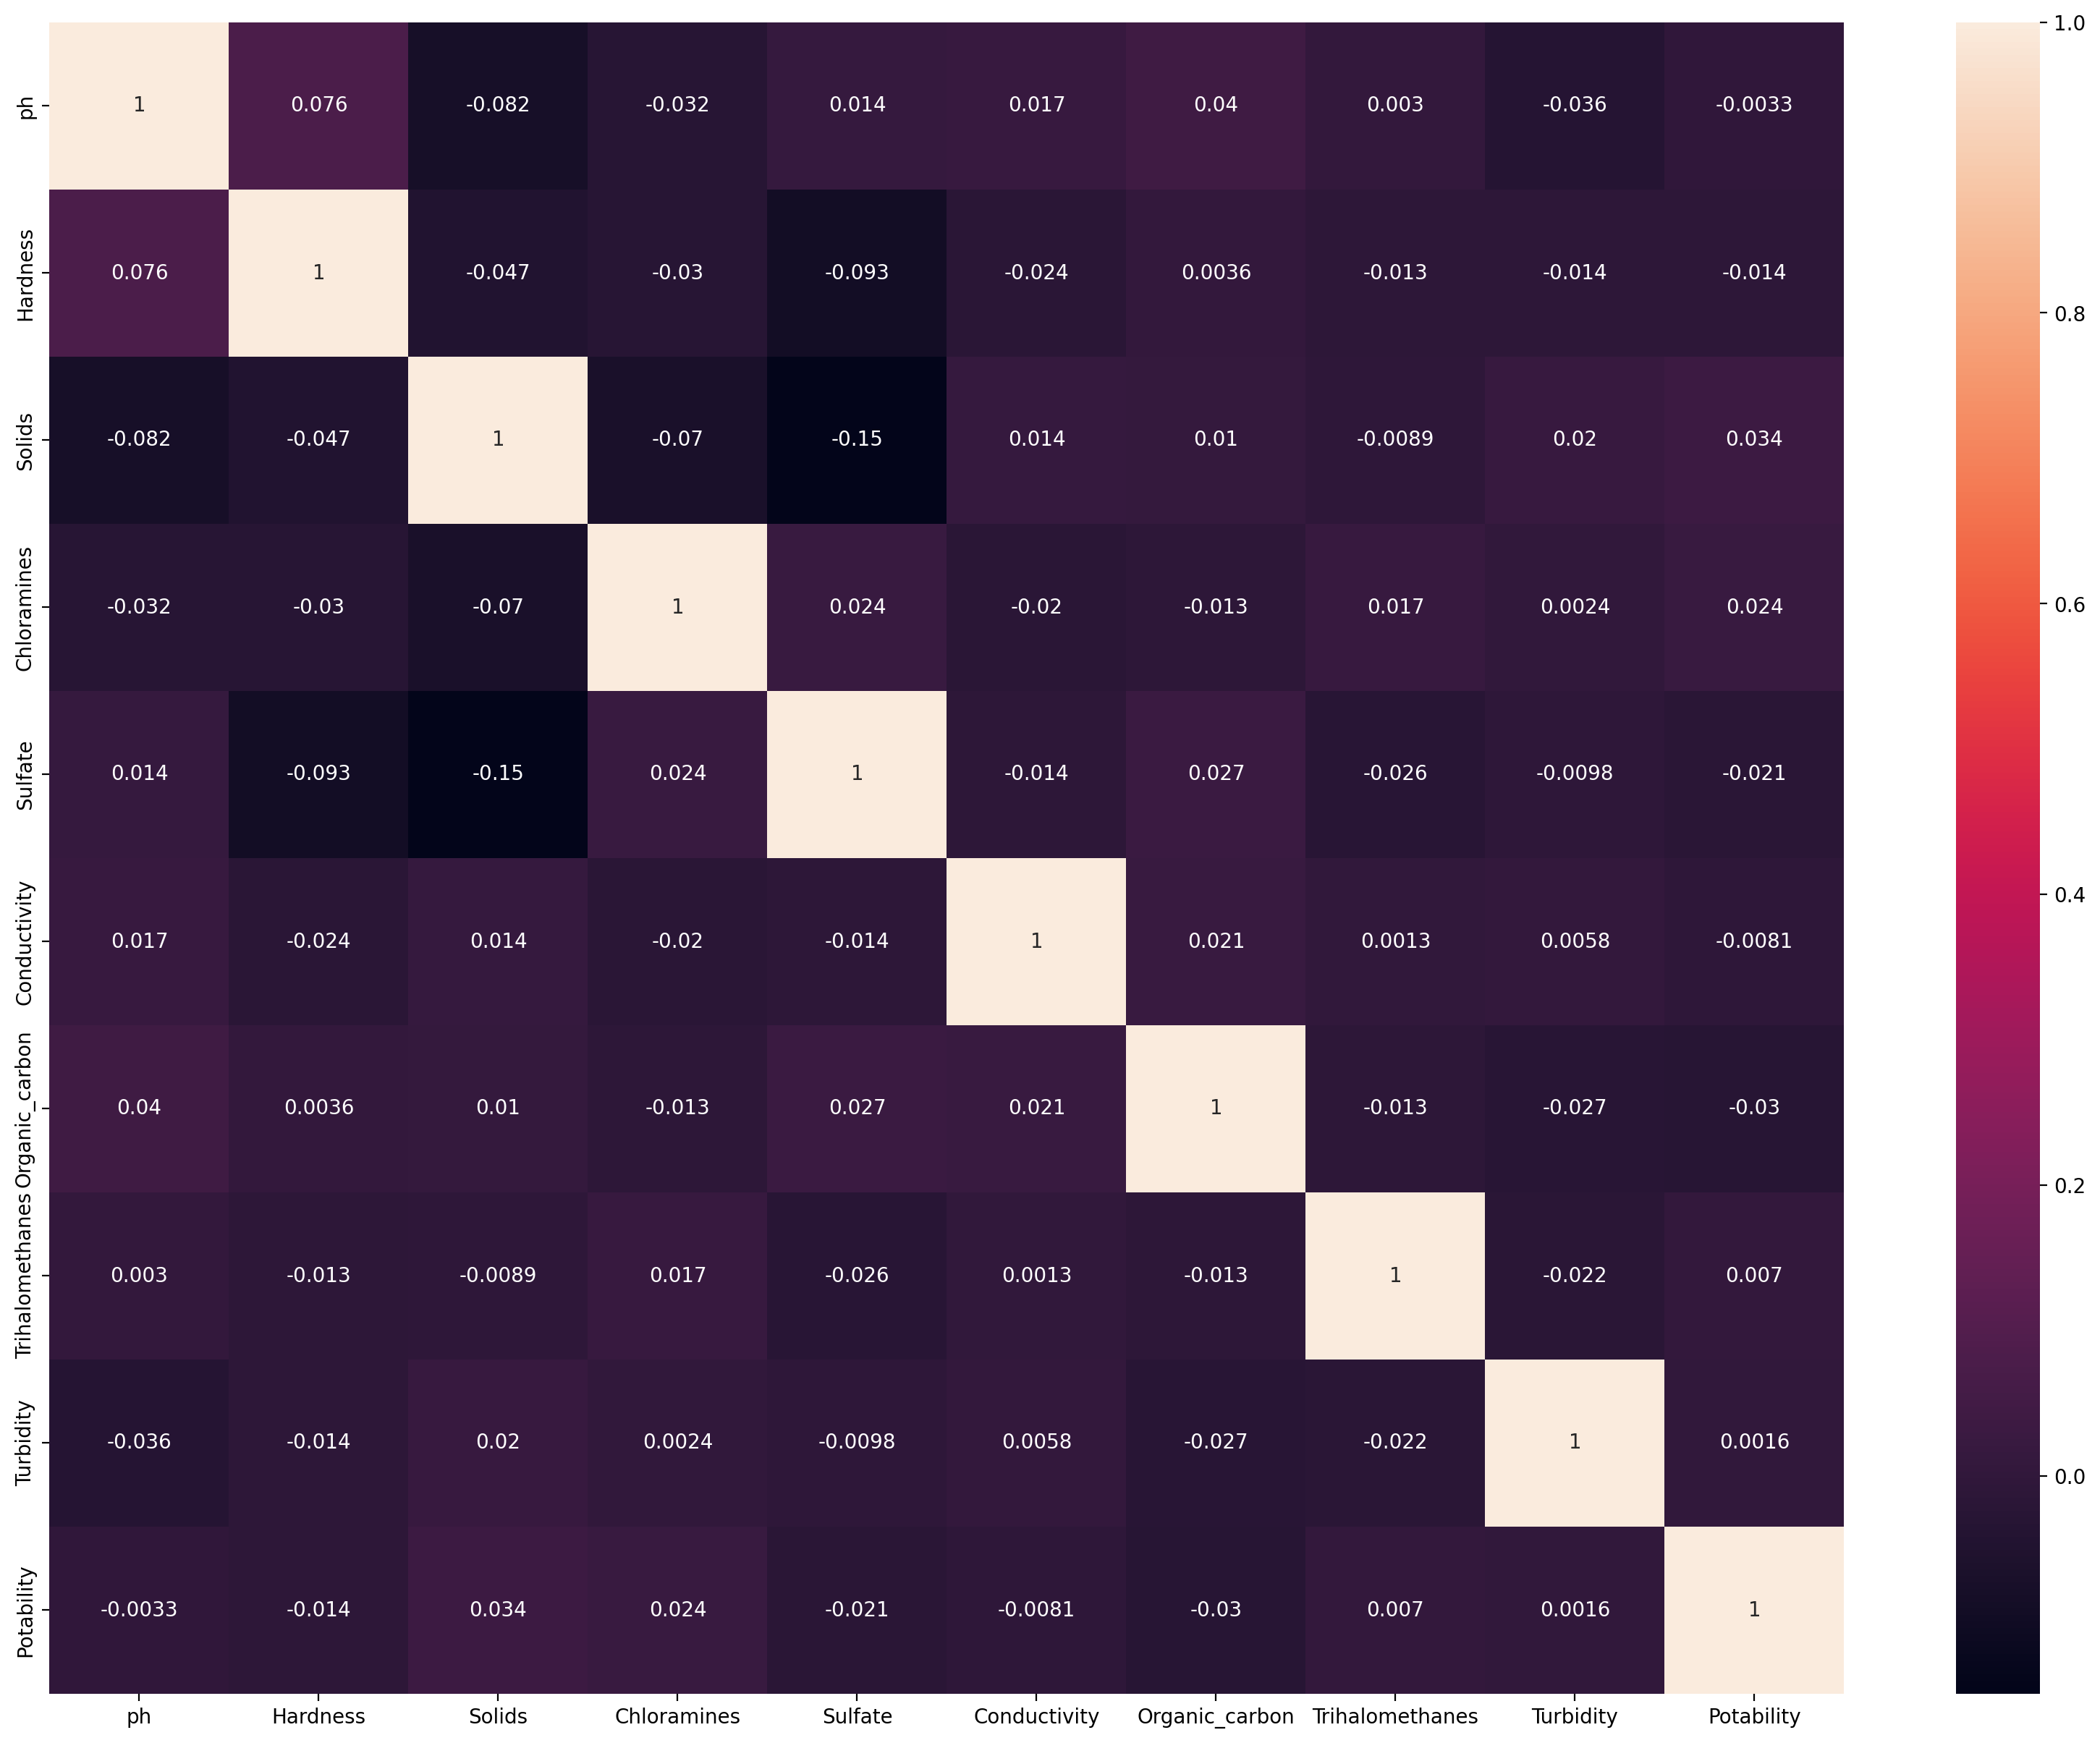

In [29]:
# cor = df.corr()
# plt.figure(figsize=(20,15),dpi=200)
# sns.heatmap(cor,annot=True)
plt.savefig('{}Heatmap.png'.format(path),bbox_inches='tight')
cor.to_csv('{}Heatmap.csv'.format(path))

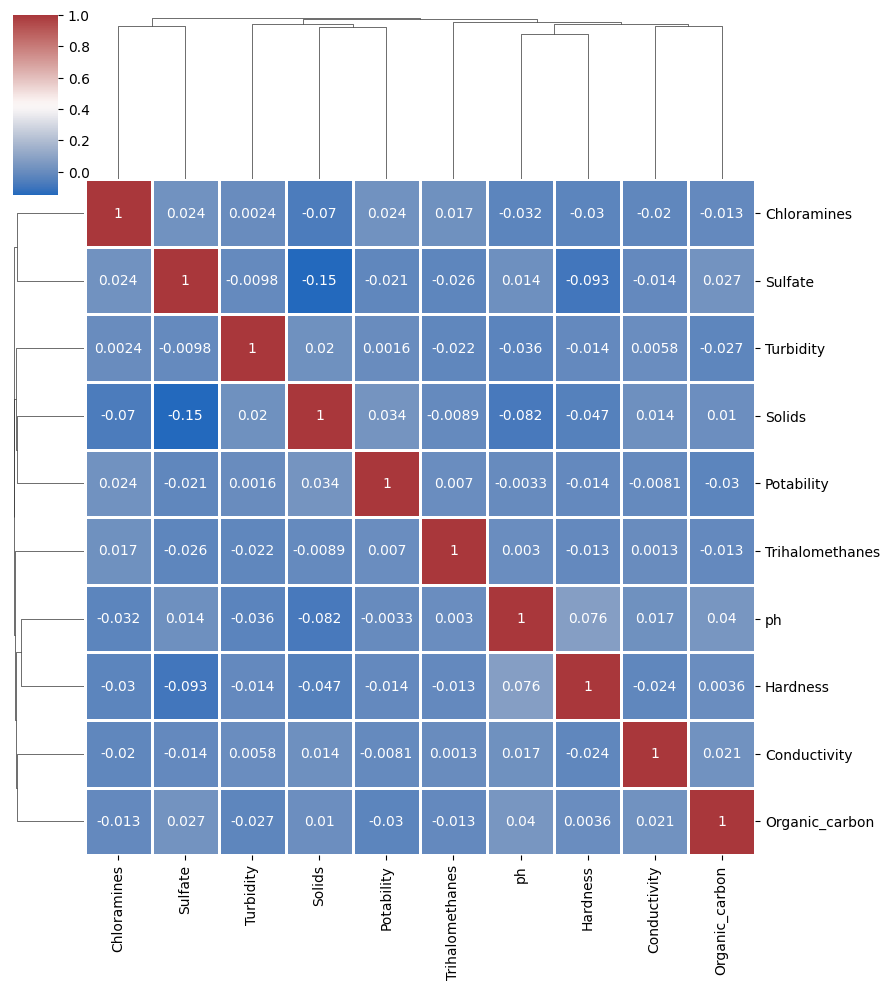

In [31]:
# Check the correlation by using clustermap
sns.clustermap(df.corr(), cmap="vlag", dendrogram_ratio=(0.1, 0.2), annot=True, linewidths=.8, figsize=(9, 10))
plt.savefig('{}Heatmap.png'.format(path),bbox_inches='tight')
df.corr().to_csv('{}Heatmap.csv'.format(path))
plt.show()

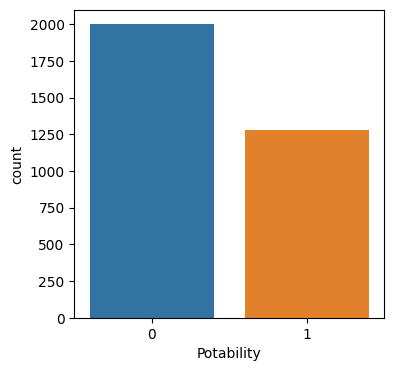

In [33]:
plt.figure(figsize = (4,4))
sns.countplot(data = df, x = df["Potability"])
plt.savefig('{}countplot.png'.format(path),bbox_inches='tight')
df["Potability"].to_csv('{}countplot.csv'.format(path))
plt.show()

In [36]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [38]:
df2 = df.copy()

In [39]:
for i in df2.columns[0:-1]:
    df2[i] = (df2[i]-df2[i].mean())/df2[i].std()

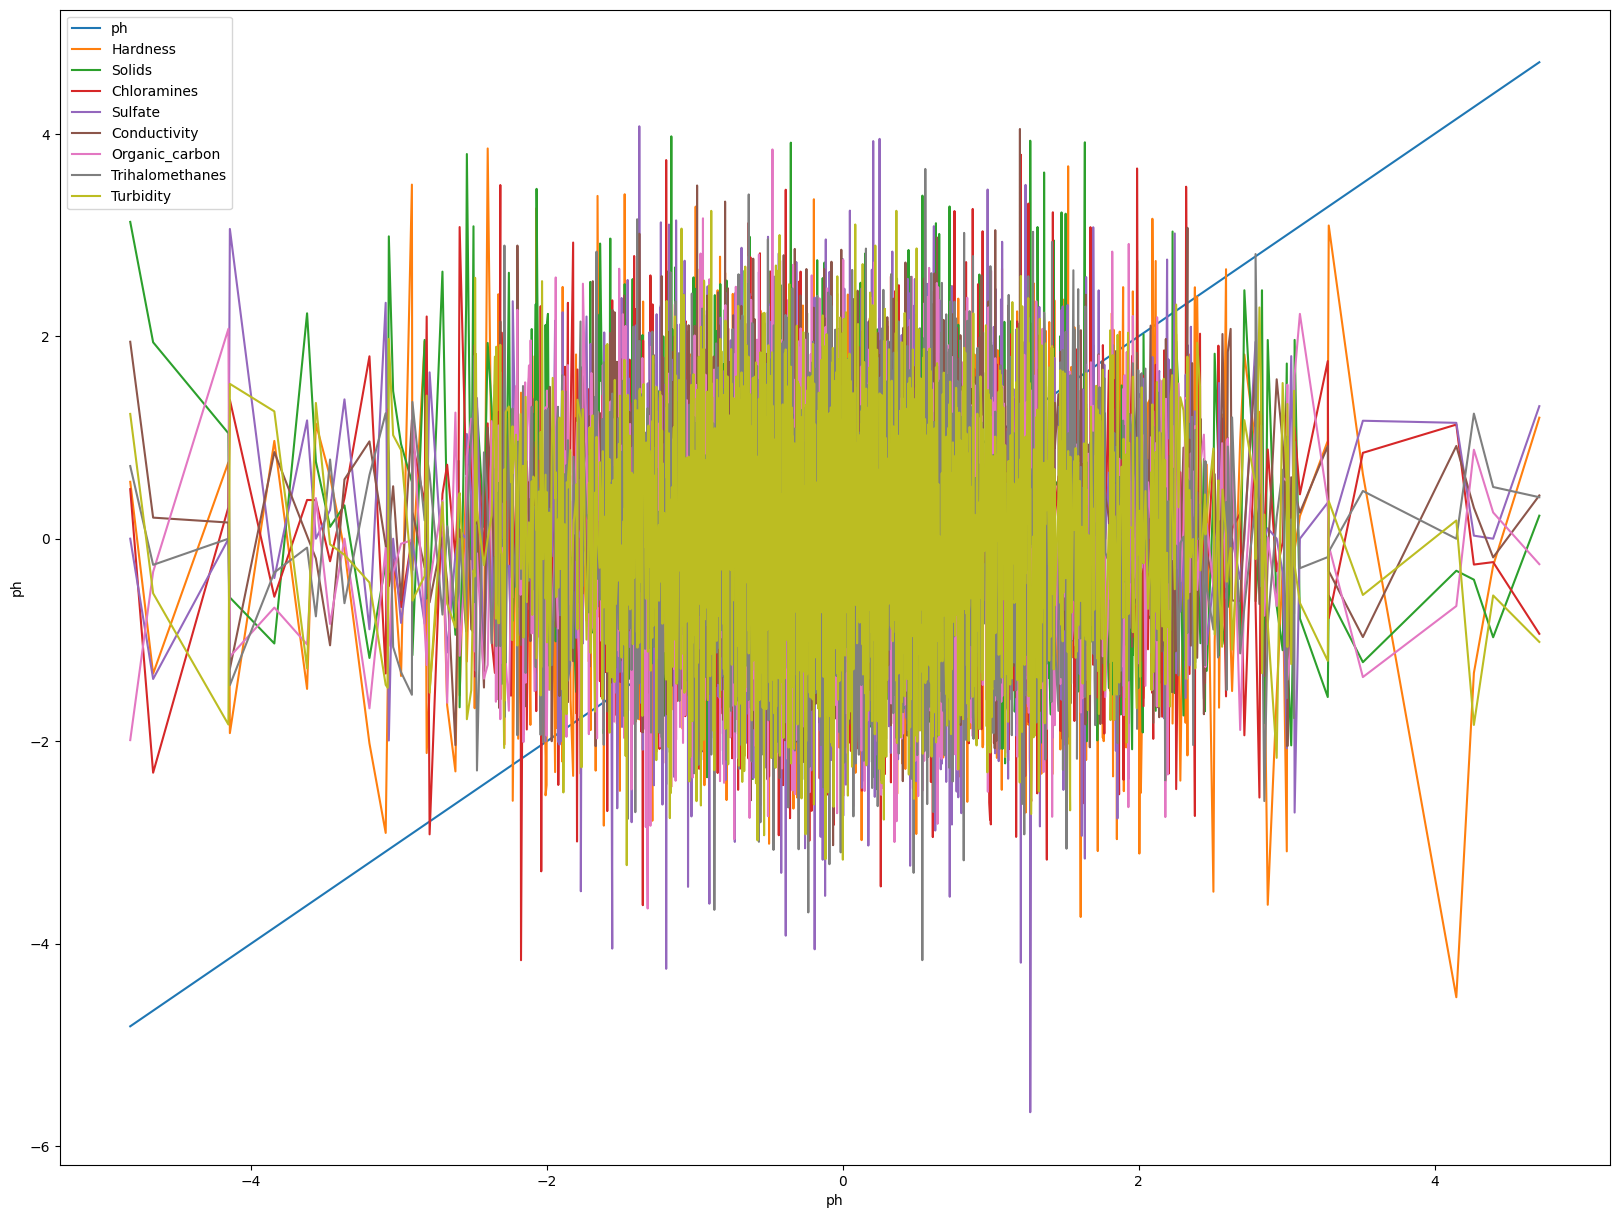

In [40]:
plt.figure(figsize=(20,15))
for i in df2.columns[0:-1]:
  sns.lineplot(data=df2, x="ph", y=i,label=i)
plt.legend(loc='upper left')
# plt.title('Drugs vs Age')
# plt.xlabel('Age')
# plt.ylabel('Drugs')
# plt.savefig('{}Drugs vs Age.png'.format(path),bbox_inches='tight')
# data[['Age','Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
    #    'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
    #    'Meth', 'Mushrooms', 'Nicotine', 'VSA']].to_csv('{}Drugs vs Age.csv'.format(path),index=False)
# plt.show()

In [41]:
cls = df.columns

# Machine Learning

In [45]:
X_ = df.drop("Potability", axis=1).values
y_ = df["Potability"].values

# Train Test Split
X, x, Y, y = train_test_split(X_, y_, test_size=0.2, random_state=3)

print("X_train", X.shape)
print("X_test", x.shape)
print("y_train", Y.shape)
print("y_test", y.shape)

X_train (2620, 9)
X_test (656, 9)
y_train (2620,)
y_test (656,)


In [46]:
clf = RandomForestClassifier()
clf.fit(X,Y)
y_ = clf.predict(x)

In [47]:
print(classification_report(y,y_))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       397
           1       0.61      0.32      0.42       259

    accuracy                           0.65       656
   macro avg       0.64      0.59      0.59       656
weighted avg       0.64      0.65      0.62       656



In [49]:
accuracy_score(y,y_),precision_score(y,y_,average='macro'),recall_score(y,y_,average='macro'),f1_score(y,y_,average='macro')

(0.6524390243902439, 0.638501457311438, 0.594740476352567, 0.5864768919412097)

In [77]:
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import *
sampler = {'RandomOverSampler':RandomOverSampler,'SMOTEENN':SMOTEENN,'SMOTEN':SMOTEN}
models = {'RandomForest':RandomForestClassifier,'XGB':XGBClassifier,'ExtraTrees':ExtraTreesClassifier,'GradientBoostingClassifier':GradientBoostingClassifier,'HistGradientBoostingClassifier':HistGradientBoostingClassifier,'AdaBoostClassifier':AdaBoostClassifier}

In [78]:
data2 = df.copy()

In [79]:
data2.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [80]:
# performance = pd.DataFrame()
smp = []
mdl = []
labels = []
epoch = []
# perf = np.zeros((len(sampler.keys()) * len(data2.columns[12:]) * len(models.keys()),4))
perf = {}
k = 0
for sm in list(sampler.keys()):
    data = data2.sample(frac=1,random_state=2342)
    rus = sampler[sm]()
    # X_,Y_= rus.fit_resample(data, data['Machine failure'])
    # print(Y_.sum()/y_.shape[0])

    # X_['Machine failure'] = Y_
    # X_ = data
    # X_ = X_.sample(frac=1)

    #   for label in data2.columns[12:]:
    # data = data2.sample(frac=1,random_state=2342)
    # data = data2.copy()
    data['Machine failure'] = data['Potability']
    data.drop('Potability',axis=1,inplace=True)
    data,tr= rus.fit_resample(data, data['Machine failure'])
    data['Machine failure'] = tr

    train = data.sample(frac=0.75,random_state=2342)
    test = data.drop(train.index)
    # train,tr= rus.fit_resample(train, train['Machine failure'])
    # train['Machine failure'] = tr

    # test = pd.concat([test[test['Machine failure']==1].sample(frac=1),test[test['Machine failure']==0].sample(test[test['Machine failure']==0].shape[0])])
    X,Y,x,y = train.drop('Machine failure',axis=1).to_numpy(),train['Machine failure'].to_numpy(),test.drop('Machine failure',axis=1).to_numpy(),test['Machine failure'].to_numpy()
    for mod in models.keys():
        # print(sm,mod,label)
        # try:
        #   model = models[mod](random_state=1234)
        # except:
        model = models[mod]()
        model.fit(X,Y)
        y_ = model.predict(x)
        smp.append(sm)
        mdl.append(mod)
        # labels.append(label)

        perf[f'{sm}-{mod}'] = [accuracy_score(y,y_),precision_score(y,y_,average='macro'),recall_score(y,y_,average='macro'),f1_score(y,y_,average='macro')]
        # k += 1
performance = pd.DataFrame().from_dict(perf,orient='index')
performance.columns = ['accuracy','precision','recall','f1']
# performanceT = performance.T
performance['model'] = mdl
performance['sampler'] = smp
# performance['label'] = labels

performance.sort_values(by='f1',ascending=False)

,accuracy,precision,recall,f1,model,sampler
RandomOverSampler-ExtraTrees,0.791792,0.801394,0.792587,0.790414,ExtraTrees,RandomOverSampler
SMOTEENN-ExtraTrees,0.794224,0.798312,0.787664,0.789841,ExtraTrees,SMOTEENN
RandomOverSampler-RandomForest,0.779780,0.780613,0.780014,0.779700,RandomForest,RandomOverSampler
SMOTEENN-HistGradientBoostingClassifier,0.772563,0.773024,0.767664,0.769084,HistGradientBoostingClassifier,SMOTEENN
SMOTEENN-XGB,0.765343,0.765004,0.760997,0.762169,XGB,SMOTEENN
SMOTEENN-RandomForest,0.765343,0.766333,0.759790,0.761311,RandomForest,SMOTEENN
RandomOverSampler-HistGradientBoostingClassifier,0.747748,0.747827,0.747817,0.747747,HistGradientBoostingClassifier,RandomOverSampler
RandomOverSampler-XGB,0.736737,0.737050,0.736544,0.736530,XGB,RandomOverSampler
SMOTEN-HistGradientBoostingClassifier,0.735736,0.746844,0.736670,0.733221,HistGradientBoostingClassifier,SMOTEN
SMOTEN-RandomForest,0.737738,0.764803,0.739159,0.731606,RandomForest,SMOTEN


In [81]:
performance.sort_values(by='f1',ascending=False,inplace=True)
performance

,accuracy,precision,recall,f1,model,sampler
RandomOverSampler-ExtraTrees,0.791792,0.801394,0.792587,0.790414,ExtraTrees,RandomOverSampler
SMOTEENN-ExtraTrees,0.794224,0.798312,0.787664,0.789841,ExtraTrees,SMOTEENN
RandomOverSampler-RandomForest,0.779780,0.780613,0.780014,0.779700,RandomForest,RandomOverSampler
SMOTEENN-HistGradientBoostingClassifier,0.772563,0.773024,0.767664,0.769084,HistGradientBoostingClassifier,SMOTEENN
SMOTEENN-XGB,0.765343,0.765004,0.760997,0.762169,XGB,SMOTEENN
SMOTEENN-RandomForest,0.765343,0.766333,0.759790,0.761311,RandomForest,SMOTEENN
RandomOverSampler-HistGradientBoostingClassifier,0.747748,0.747827,0.747817,0.747747,HistGradientBoostingClassifier,RandomOverSampler
RandomOverSampler-XGB,0.736737,0.737050,0.736544,0.736530,XGB,RandomOverSampler
SMOTEN-HistGradientBoostingClassifier,0.735736,0.746844,0.736670,0.733221,HistGradientBoostingClassifier,SMOTEN
SMOTEN-RandomForest,0.737738,0.764803,0.739159,0.731606,RandomForest,SMOTEN


# 5

# 6